# Lab 5: pandas
Complete the following 2 problems using your knowledge of `DataFrames`. You will need the `pandas` library and the `matplotlib.pylab` library.

**Rubric**
- 4 points: Completes both problems as described
- 3 points: Completes one of the problems as described
- 2 points: Missing or incomplete


## Problem 1: Population Data 
In this example we will fetch data about countries and their population from [Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population).

I have done the web scraping and creation of a `DataFrame`,`df_a`.

In [64]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

tbody = soup.find_all("tbody")
tr = tbody[0].find_all("tr")
arr = []
mat = []
for t in tr:
    lst = t.text.split("\n")
    for l in lst:
        if l == "":
            if arr != []:
                arr = arr[0:2] + arr[2::2]
                mat.append(arr)
                arr = []
        else:
            try: 
                arr.append(int(l.lstrip('\xa0').replace(",","")))
            except ValueError:
                arr.append(str(l.lstrip('\xa0').replace(",","")))
titles = mat[0]
titles[0] = "countries"
mat = mat[1:]
df_a = pd.DataFrame.from_records(mat, columns=titles) 

### Investigating DataFrames
Write code in the boxes below to display the following information:


1. The number of records `df_a`

In [65]:
len(df_a)

228

2. The last 11 rows of `df_a`

In [66]:
df_a[-11:]

,countries,1950,1955,1960,1965,1970,1975,1980
217,Uruguay,2195,2354,2531,2694,2824,2844,2931
218,Uzbekistan,6293,7233,8532,10206,11941,13988,15994
219,Vanuatu,53,59,67,75,86,100,117
220,Venezuela,5010,6171,7557,9068,10759,12675,14768
221,Vietnam,25349,27739,31657,37259,42577,48076,53716
222,Wallis and Futuna,7,8,8,9,9,9,11
223,Western Sahara,10,16,28,50,90,73,125
224,Yemen,4778,5266,5872,6511,7099,7935,9133
225,Zambia,2554,2870,3255,3695,4241,4849,5541
226,Zimbabwe,2854,3410,4011,4686,5515,6342,7170


3. A 5 number summary of `df_a`

In [67]:
df_a.describe()

,1950,1955,1960,1965,1970,1975,1980
count,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02,2.280000e+02
mean,2.243589e+04,2.440490e+04,2.669352e+04,2.939022e+04,3.256806e+04,3.586970e+04,3.904757e+04
std,1.750677e+05,1.903733e+05,2.080701e+05,2.290908e+05,2.542257e+05,2.802368e+05,3.049422e+05
min,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
25%,1.130000e+02,1.270000e+02,1.495000e+02,1.800000e+02,2.162500e+02,2.250000e+02,2.550000e+02
50%,1.812500e+03,1.952500e+03,2.155500e+03,2.569500e+03,2.807000e+03,3.013500e+03,3.315000e+03
75%,6.328250e+03,7.083750e+03,7.656500e+03,8.520250e+03,9.321000e+03,1.005725e+04,1.039475e+04
max,2.557629e+06,2.782099e+06,3.043002e+06,3.350426e+06,3.712698e+06,4.089084e+06,4.451363e+06


4. How is the `DataFrame` currently indexed? If it is not already, make the `countries` column the index.

In [68]:
df_a.set_index(keys=df_a["countries"],inplace=True)
df_a = df_a.drop(columns="countries")
df_a

,1950,1955,1960,1965,1970,1975,1980
countries,,,,,,,
Afghanistan,8151,8892,9830,10998,12431,14133,15045
Albania,1228,1393,1624,1884,2157,2402,2672
Algeria,8893,9842,10910,11964,13932,16141,18807
American Samoa,20,20,21,25,28,30,33
Andorra,7,7,9,14,20,27,34
...,...,...,...,...,...,...,...
Western Sahara,10,16,28,50,90,73,125
Yemen,4778,5266,5872,6511,7099,7935,9133
Zambia,2554,2870,3255,3695,4241,4849,5541


5. What is the largest population listed for 1970?

In [69]:
countrys = df_a.drop(index='World')[1970]
print(f"High Pop: {countrys.max()}")

High Pop: 822116


6. What was the country for that entry?

In [70]:
print(countrys.sort_values(ascending=False)[:"China"])
countrys.idxmax()

countries
China    822116
Name: 1970, dtype: int64


'China'

7. What was the population of Austria from 1950-1980?

In [71]:
df_a.loc["Austria", 1950:1980]

1950    6936
1955    6947
1960    7048
1965    7271
1970    7468
1975    7579
1980    7550
Name: Austria, dtype: int64

8. What was the population of France in 1965?

In [72]:
df_a.loc["France", [1965]]

1965    49834
Name: France, dtype: int64

9. What was the population in 1980 of the 200th country on the list?

In [73]:
df_a.reset_index(drop=False).loc[200, ["countries",1980]]

countries    Tanzania
1980            18654
Name: 200, dtype: object

### Sorting and Joining Tables

10. What 5 entries had the highest population in 1970? Display their records.

### Sorting and Joining Tables

10. What 5 entries had the highest population in 1970? Display their records.

In [74]:
countrys.sort_values(ascending=False)[:5]

countries
China            822116
India            553889
United States    203985
Russia           130246
Indonesia        122292
Name: 1970, dtype: int64

Below is code to scrape two more tables off of Wikipedia: World Populations from 1985-2015 and World Populations from 2020-2050. They are stored as the `DataFrames` `df_b` and `df_c` respectively. Use these two `DataFrames ` to answer the remaining questions.

In [75]:
for i in range(2):
    tbody = soup.find_all("tbody")
    tr = tbody[i+1].find_all("tr")
    arr = []
    mat = []
    for t in tr:
        lst = t.text.split("\n")
        for l in lst:
            if l == "":
                if arr != []:
                    arr = [arr[0]] + arr[1::2]
                    mat.append(arr)
                    arr = []
            else:
                try: 
                    arr.append(int(l.lstrip('\xa0').replace(",","")))
                except ValueError:
                    arr.append(str(l.lstrip('\xa0').replace(",","")))
    titles = mat[0]
    titles[0] = "countries"
    mat = mat[1:]
    if i == 0: df_b = pd.DataFrame.from_records(mat, columns=titles) 
    else: df_c = pd.DataFrame.from_records(mat, columns=titles) 

df_b.set_index('countries', inplace=True) 
df_c.set_index('countries', inplace=True) 
# where df_a is 1950-1980, df_b is 1985-2015, df_c is 2020-2050

12. What are the dimensions of these two `DataFrames`? 

In [76]:
print(f"B: {df_b.shape}\nC: {df_c.shape}")

B: (227, 7)
C: (228, 7)


13. Combine all three tables into a `DataFrame ` called `df` that stores a country's population from 1950-2050 and display its first 5 entries.

In [77]:
conbine = pd.concat([df_a,df_b,df_c], axis=1)
conbine[:5]

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
countries,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8151,8892,9830,10998,12431,14133,15045,13120.0,13569.0,19446.0,...,26335.0,29121.0,32565.0,36644,41118,45665,50195,54717,59256,63796
Albania,1228,1393,1624,1884,2157,2402,2672,2957.0,3245.0,3159.0,...,3025.0,2987.0,3030.0,3075,3105,3103,3063,2994,2913,2825
Algeria,8893,9842,10910,11964,13932,16141,18807,22009.0,25191.0,28322.0,...,32918.0,35950.0,39543.0,42973,45842,48149,50118,52030,53894,55445
American Samoa,20,20,21,25,28,30,33,39.0,48.0,54.0,...,57.0,56.0,55.0,54,54,53,52,51,50,50
Andorra,7,7,9,14,20,27,34,45.0,53.0,64.0,...,77.0,85.0,86.0,86,86,85,83,82,79,75


14. What was country with the smallest population in 2000?

In [78]:
conbine.sort_values(by=2000,ascending=True)[2000]

countries
Montserrat                                           4.0
Saint Pierre and Miquelon                            7.0
Saint Barthélemy                                     8.0
Saint Helena Ascension and Tristan da Cunha          8.0
Nauru                                               10.0
                                                 ...    
United States                                   282163.0
India                                          1006301.0
China                                          1268302.0
World                                          6088572.0
Aruba                                                NaN
Name: 2000, Length: 228, dtype: float64

15. What was the mean population in 2005?

In [79]:
conbine.loc[:,[2005]].mean()

2005    57031.334802
dtype: float64

### Plotting with Matplotlib
We are going to use `matplotlib` to visualize our data. 

Import it below.

In [80]:
import matplotlib.pylab as plt

Create a plot with `plot()` to compare the population of Austria, Germany, United States, and France from 1950-2050. Your graph needs to include a  proper title, axis labels, and legend.

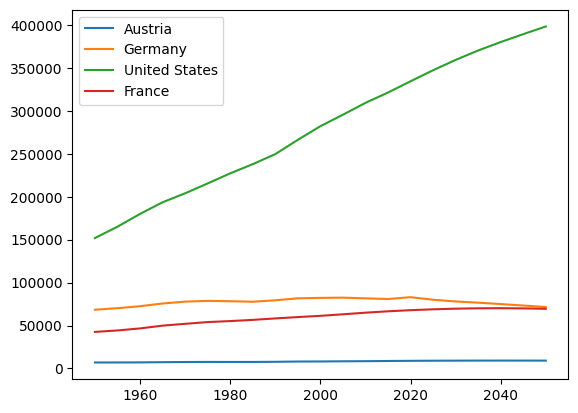

In [81]:
comp = conbine.loc[["Austria","Germany","United States","France"]]

for c in comp.index:
    plt.plot(comp.loc[[c]].mean(), label = c)
plt.legend()

#### Challenge(Optional): Plot 5 most populous countries from 2010 and 2050
Display a plot of the population from 1950-2050 of the 5 most populous countries from 2010 side-by-side with a plot of the population from 1950-2050 of the 5 most populous countries from 2050

In [82]:
comp = conbine.drop(index="World")
a10 = comp.sort_values(by=2010,ascending=False).head(5)
a50 = comp.sort_values(by=2050,ascending=False).head(5)
a10

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
countries,,,,,,,,,,,,,,,,,,,,,
China,562580,607047,651340,716667,822116,920295,987822,1061876.0,1153164.0,1221056.0,...,1302285.0,1336681.0,1367486.0,1397026,1410807,1419019,1424558,1428383,1433211,1437978
India,369881,404268,445394,494964,553889,618923,684888,759613.0,838159.0,920585.0,...,1090974.0,1173109.0,1251696.0,1326094,1396047,1460744,1519491,1571716,1617238,1656554
United States,151869,165070,179980,193527,203985,215466,227225,237924.0,249623.0,266279.0,...,295517.0,309348.0,321369.0,334504,347335,359403,370339,380220,389395,398329
Indonesia,82979,90255,100146,110754,122292,135214,150322,166070.0,181600.0,197604.0,...,229245.0,243423.0,255994.0,279080,288429,296450,305653,314085,321524,327282
Brazil,53444,61652,71412,82602,94931,107328,121064,135734.0,149410.0,161912.0,...,186021.0,195835.0,204260.0,216016,223028,228720,233068,236077,237826,238390


Text(0.5, 1.0, '2050')

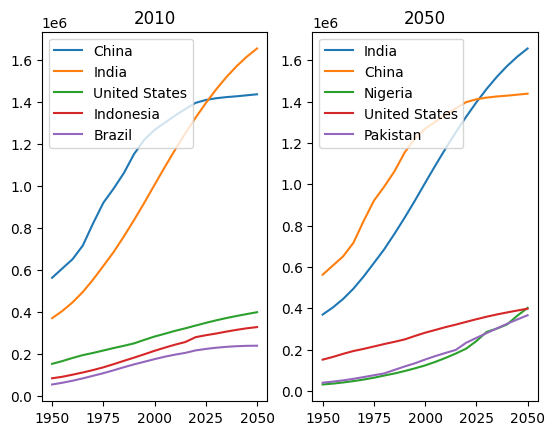

In [83]:
fig, axs = plt.subplots(ncols=2,nrows=1)


for c in a10.index:
    axs[0].plot(comp.loc[[c]].mean(), label = c)
axs[0].legend()
axs[0].set_title(2010)

for c in a50.index:
    axs[1].plot(comp.loc[[c]].mean(), label = c)
axs[1].legend()
axs[1].set_title(2050)

## Problem 2: Rotten Tomatoes Database

We are going to use a dataset of Rotten Tomatoes scores. I have imported it for you, as the `DataFrame` called `movies`.

In [84]:
# Get this one from the internet but also use the IMDB one
from io import StringIO  
movie_txt = requests.get('https://raw.github.com/cs109/cs109_data/master/movies.dat').text
movie_file = StringIO(movie_txt) # treat a string like a file
movies = pd.read_csv(movie_file, delimiter='\t')


1. What do each of the columns of this `DataFrame` mean? Fill in the following box with a short description of each of the columns. Be specific!

If you need some help [look at the README](https://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-readme.txt) for the dataset.

- id: Count
- title: movie title
- imdbID: movie id to imdb
- spanTitle: title but Spanish
- imdbPicureURL: link to the stored movie picture
- year: movie release
- rtID: rotten tomatos id of the moive
- rtAllCriticsRating: the "Rotten Tomatos cridicts" advrage score for the movie
- rtAllCriticsNumReviews: Number of "Rotten Tomatos cridicts" sumitted reviews
- rtAllCriticsNumFresh: another uselss ratiting
- rtAudienceRating: Something related to Audence
- rtAudienceNumRating: Count of Audence Ratings
- rtAudienceScore: Audience Raiting Mean
- rtPictureURL: Url for the movie picture

2. Set the column `id` as the index for the dataset.

In [85]:
movies.set_index(keys=movies["id"],inplace=True)
movies = movies.drop(columns="id")
movies

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,0,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,15,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,12,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,11,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,10,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65037,Ben X,953318,Ben X,http://ia.media-imdb.com/images/M/MV5BMTkxMDMy...,2007,10009212-ben_x,6.3,36,24,12,66,6.1,7,4,3,57,3.9,2886,82,http://content9.flixster.com/movie/10/86/82/10...
65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104,26,78,25,4.7,26,6,20,23,3.5,108877,63,http://content6.flixster.com/movie/10/94/33/10...
65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7,12,10,2,83,0,4,2,2,50,3.7,344,71,http://content9.flixster.com/movie/66/44/64/66...


3. We want to make a plot of the top 10 highest rated movies on Rotten Tomatoes by Audience Score. Sort the table by `rtAudienceScore` and make a plot of the top 10 movies. What happens?


*Matplotlib tip: use `plt.bar(df['x_col'], df['y_col'],...)` then use other matplotlib methods to add important features to the graph*

<BarContainer object of 10 artists>

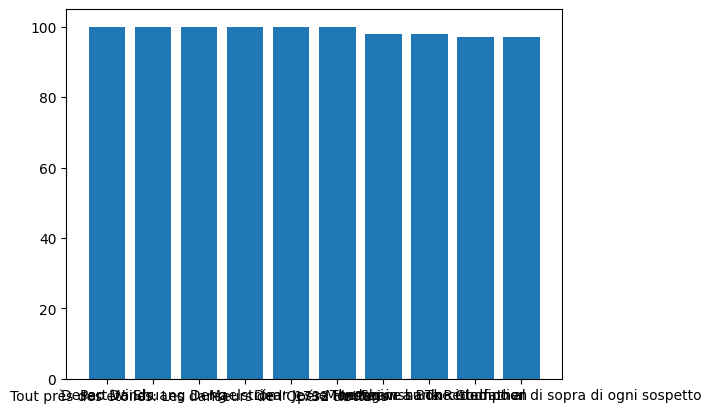

In [86]:
au_ti = movies.loc[:,["rtAudienceScore"]]
au_ti.set_index(keys=movies["title"],inplace=True)
au_ti = pd.to_numeric(au_ti["rtAudienceScore"],errors="coerce").dropna()

amount = au_ti.sort_values(ascending=False).head(10)
plt.bar(amount.index,amount.values)


4. What has happened to our plot? How can we remove our empty values? Remove those values and try it again?

In [87]:
au_ti = movies.loc[:,["rtAudienceScore"]]
au_ti = pd.to_numeric(au_ti["rtAudienceScore"],errors="coerce")
au_ti = au_ti.dropna()

au_ti.sort_values(ascending=False).head(10)

id
395     100.0
309     100.0
5811    100.0
5071    100.0
1901    100.0
4311    100.0
7620     98.0
318      98.0
858      97.0
6019     97.0
Name: rtAudienceScore, dtype: float64

5. Does this plot look right? What other rows might we want to exclude or columns we might want to sort by, so our top 10 list looks more similar to other lists.

In [88]:
au_ti = movies.sort_values(by='rtAudienceScore',ascending=False)
au_ti["rtAudienceScore"] = pd.to_numeric(movies["rtAudienceScore"],errors="coerce")
au_ti["rtAudienceScore"] = movies["rtAudienceScore"].dropna()

au_ti.loc[:,["title","rtAudienceScore"]].head(10)

,title,rtAudienceScore
id,,
4962,"Walker, Texas Ranger",\N
33154,Enron: The Smartest Guys in the Room,\N
4026,Injeong sajeong bol geot eobtda,\N
36541,Succubus: Hell Bent,\N
789,"Yo, la peor de todas",\N
3047,Experience Preferred... But Not Essential,\N
7110,Môjû tai Issunbôshi,\N
5188,How to Beat the High Co$t of Living,\N
4724,On the Edge,\N


6. We want to know what years the most popular movies were made in. In the box below, rewrite our question/statement as something that is is specific and answerable using our dataset. There is no one "correct" answer here. 

New question: Mean of all Audience moive scores for a year

7. Create a plot that answers your new question.

In [89]:
years = {}
scores = {}

for i in movies.index:
    year,score = movies.loc[[i],['year']].values.item(),movies.loc[[i],['rtAudienceScore']].values.item()

    if years.get(year) == None:
        years[year] = 0
        scores[year] = 0

    try:
        years[year] += 1
        scores[year] += int(score)
    except:
        continue


data = pd.DataFrame({
     "Movie Count": years,
     "TScore": scores,
})

data["MeanScore"] = data["TScore"]/data["Movie Count"]
data[:10]

,Movie Count,TScore,MeanScore
1995,300,14358,47.860000
1993,230,11156,48.504348
1954,38,1326,34.894737
2009,21,1210,57.619048
2007,360,19957,55.436111
1994,254,12429,48.933071
1997,323,16327,50.547988
1996,306,14414,47.104575
2005,330,17914,54.284848
1998,329,16486,50.109422


8. What if we want to balance audience and critics scores? Create a new column called `rtWeightedScores` to store a movies' overall weighted average score of 70% Top Critics Scores and 30% Audience Scores.  

In [127]:
crips = pd.to_numeric(movies["rtAllCriticsRating"],errors="coerce").dropna()
adui = pd.to_numeric(movies["rtAudienceRating"],errors="coerce").dropna()

movies["rtWeightedRating"] = (crips*.7)+(adui*.3)
movies.sort_values(by="rtWeightedRating",ascending=False).loc[:10,["title","rtAllCriticsRating","rtWeightedRating","rtWeightedRating"]]

,title,rtAllCriticsRating,rtWeightedRating,rtWeightedRating
id,,,,
6643,Tôkyô monogatari,9.6,8.04,8.04
25954,Orphée,9.5,7.91,7.91
6981,Ordet,9.4,7.90,7.90
2731,Les quatre cents coups,9.3,7.83,7.83
923,Citizen Kane,9.4,7.81,7.81
...,...,...,...,...
321,Fresa y chocolate,6.6,5.79,5.79
5608,Das Experiment,6.6,5.79,5.79
6849,Scrooge,6.8,5.78,5.78


9. Create a histogram to show the number of movies with each weighted score. Your "buckets" should be from 0-10 and go up by 0.5. 

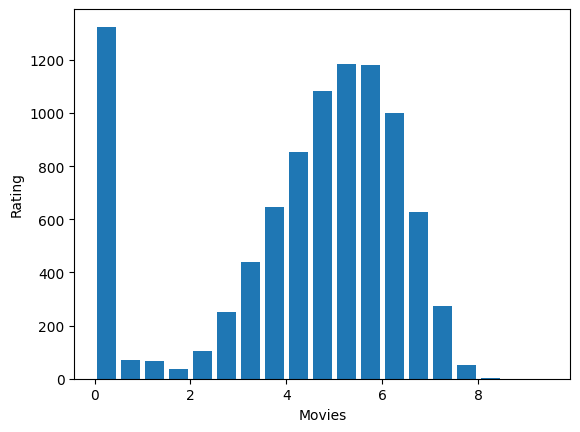

In [163]:
plt.xlabel("Movies")
plt.ylabel("Rating")
plt.hist(movies['rtWeightedRating'],bins=np.arange(0,10,.5), rwidth=0.8)
plt.show()

10. What are the top 10 movies based on our new list?

In [ ]:
amount.loc[:,["title","rtWeightedScores"]].head(10)

,title,rtWeightedScores
id,,
858,The Godfather,99.1
47,Shichinin no samurai,99.1
6019,Indagine su un cittadino al di sopra di ogni s...,99.1
2931,Dom za vesanje,98.8
6669,Ikiru,98.8
26082,Seppuku,98.8
6896,Shoah,98.8
1203,12 Angry Men,98.5
1232,Stalker,98.5
